# Сегментация бинаризацией

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
!wget https://i.ebayimg.com/images/g/dAYAAOSwaCBhZ2ZH/s-l1600.jpg -O coin.jpg

--2024-04-01 11:02:44--  https://i.ebayimg.com/images/g/dAYAAOSwaCBhZ2ZH/s-l1600.jpg
Распознаётся i.ebayimg.com (i.ebayimg.com)… 117.18.238.216
Подключение к i.ebayimg.com (i.ebayimg.com)|117.18.238.216|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Кукисы, полученные из i.ebayimg.com, попытались изменить домен на ebay.com
Длина: 104687 (102K) [image/jpeg]
Сохранение в: «coin.jpg»

coin.jpg            100%[===================>] 102,23K  --.-KB/s    за 0,1s    

2024-04-01 11:02:46 (697 KB/s) - «coin.jpg» сохранён [104687/104687]



In [9]:
img = cv2.imread('coin.jpg')

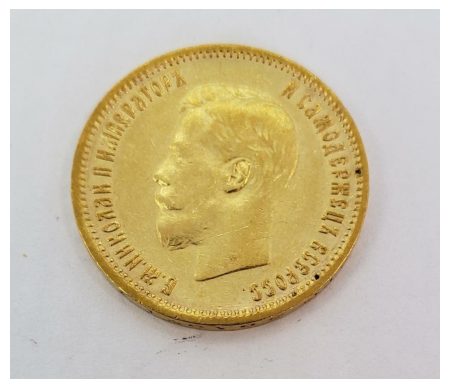

In [12]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.cm.binary)

In [19]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Переводим в rgb (opencv Загружает по-умолчанию в bgr)

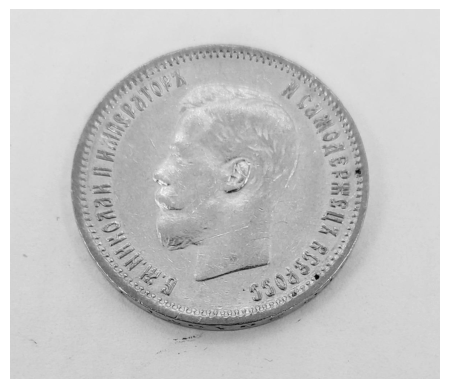

In [18]:
plt.axis('off')
plt.imshow(img_gray, cmap=plt.cm.gray)

Выбираем границу (трешхолд)

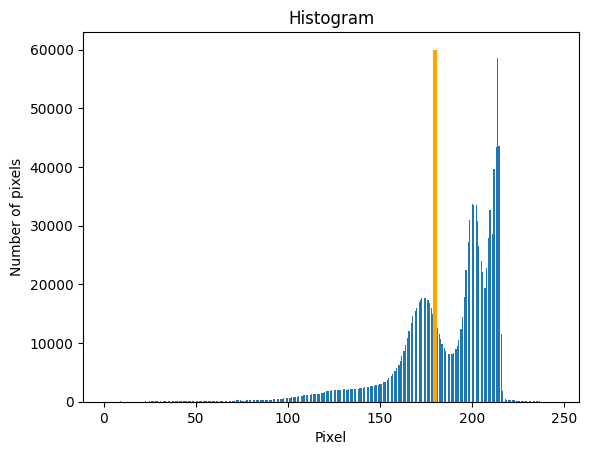

In [31]:
fig, ax = plt.subplots()
ax.hist(img_gray.ravel(), bins=356)
ax.set_title('Histogram')
ax.set_xlabel('Pixel')
ax.set_ylabel('Number of pixels')
ax.vlines(x=180, ymin=0, ymax=6e4, linewidth=3, color='orange', linestyle='-')
plt.show()

In [32]:
img_bin = (img_gray > 180)
img_bin

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

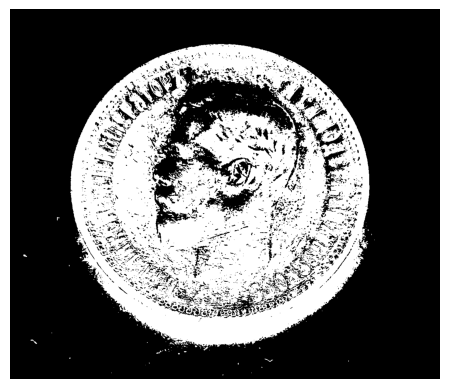

In [36]:
plt.axis('off')
plt.imshow(img_bin, cmap=plt.cm.binary)

##  Распознавание автомобильного номера

In [37]:
!wget https://dubllikat.ru/images/price/rus-jir.jpg -O plate.jpg

--2024-04-01 11:18:04--  https://dubllikat.ru/images/price/rus-jir.jpg
Распознаётся dubllikat.ru (dubllikat.ru)… 45.130.41.47
Подключение к dubllikat.ru (dubllikat.ru)|45.130.41.47|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 20449 (20K) [image/jpeg]
Сохранение в: «plate.jpg»

plate.jpg           100%[===================>]  19,97K  --.-KB/s    за 0s      

2024-04-01 11:18:04 (149 MB/s) - «plate.jpg» сохранён [20449/20449]



In [38]:
img = cv2.imread('plate.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray = cv2.GaussianBlur(img_gray, (7, 7), 0)

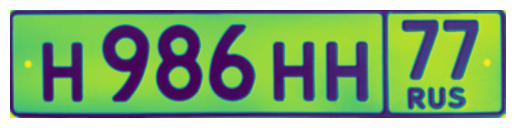

In [41]:
plt.axis("off")
plt.imshow(img_gray)
img_gray = cv2.GaussianBlur(img_gray, (7, 7), 0)
plt.imshow(img_gray)


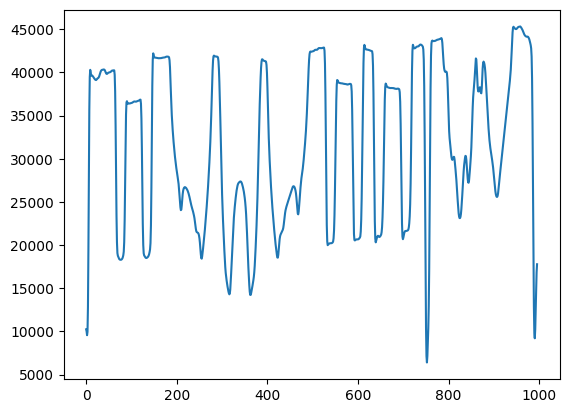

In [44]:
plt.plot(range(img_gray.shape[1]), np.sum(img_gray, axis=0))

In [57]:
cv2.THRESH_BINARY | cv2.THRESH_OTSU

8

In [64]:
(T, threshInv) = cv2.threshold(img_gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)

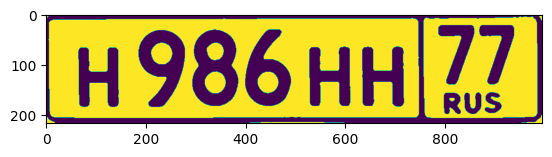

In [65]:
plt.imshow(threshInv)

#### Обрезка рамок

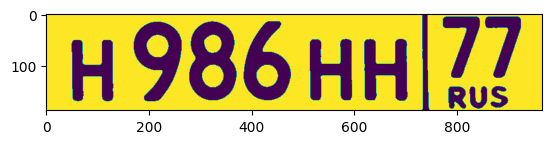

In [71]:
plt.imshow(threshInv[15:-15, 15:-15])

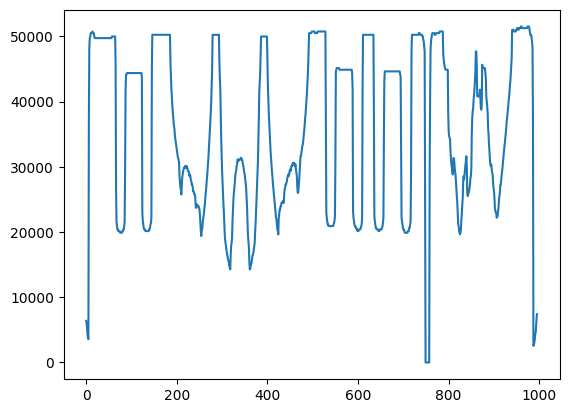

In [72]:
plt.plot(range(threshInv.shape[1]), np.sum(threshInv, axis=0))

In [103]:
x = np.sum(threshInv, axis=0)
len(x)

996

In [52]:
from scipy.signal import find_peaks

In [124]:
peaks, _ = find_peaks(x, height=35000, distance=50)

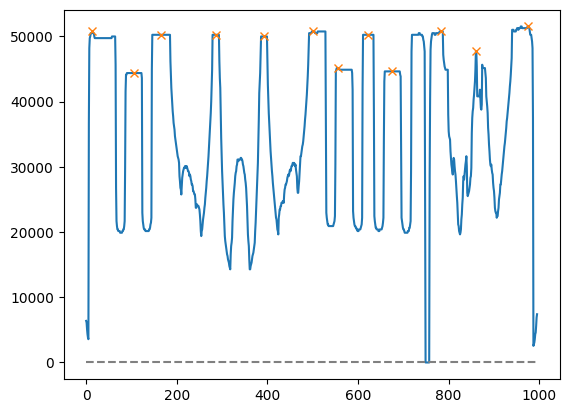

In [125]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

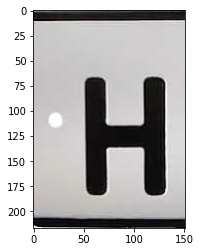

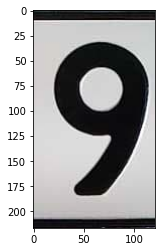

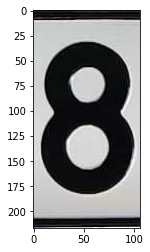

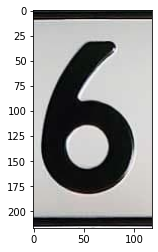

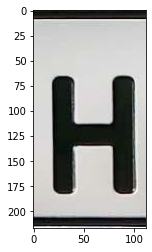

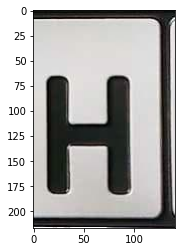

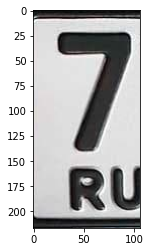

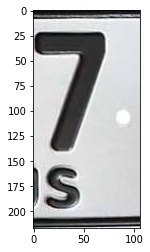

In [ ]:
for i in range(len(peaks)-1):
  plt.imshow(img[:, peaks[i]:peaks[i+1]])
  plt.show()